# [Pandas](https://pandas.pydata.org/docs/user_guide/index.html)
> 데이터 처리와 분석을 위한 라이브러리

- [Install Pandas](https://pandas.pydata.org/docs/getting_started/index.html)

In [1]:
import numpy as np
import pandas as pd

## 데이터 구조

### Series
- 1차원 구조로 되어 있는 데이터
> pd.Series(data=None, index=None, dtype=None, name=None, copy=False)

#### Series 생성

In [2]:
data = {'a':1, 'b':2, 'c':3} # 딕셔너리
pd.Series(data=data, dtype=np.int16, name='dict')

,dict
a,1
b,2
c,3


In [3]:
# 스칼라 값인 경우 인덱스를 제공해야 함
pd.Series(5.0, index=['a', 'b', 'c', 'd', 'e'])

,0
a,5.0
b,5.0
c,5.0
d,5.0
e,5.0


In [4]:
# np.random.randn: 가우시안 정규분포 난수
s = pd.Series(data=np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

,0
a,-0.703809
b,-0.646767
c,-0.168987
d,-0.272894
e,0.045593


#### 슬라이싱/인덱스
Numpy와 같이 슬라이싱/인덱스과 같은 작업 가능

In [5]:
s[0]

<ipython-input-5-c9c96910e542>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[0]


-0.7038088993130326

In [6]:
s[:3]

,0
a,-0.703809
b,-0.646767
c,-0.168987


In [7]:
s[s>s.median()], s.median()

(c   -0.168987
 e    0.045593
 dtype: float64,
 -0.272894431516694)

In [9]:
s

,0
a,-0.703809
b,-0.646767
c,-0.168987
d,-0.272894
e,0.045593


In [8]:
'a' in s

True

In [10]:
't' in s

False

In [11]:
s

,0
a,-0.703809
b,-0.646767
c,-0.168987
d,-0.272894
e,0.045593


In [12]:
s.get('a')

-0.7038088993130326

In [13]:
s.get('rr')

In [14]:
s.get('rr', '값이 없음')

'값이 없음'

In [15]:
s

,0
a,-0.703809
b,-0.646767
c,-0.168987
d,-0.272894
e,0.045593


In [16]:
s[0]

<ipython-input-16-c9c96910e542>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[0]


-0.7038088993130326

In [19]:
lst = [4,2,1]

########3
# 작업
####
a = s
c = s
s[lst], a[lst], c[lst] # c[[4,2,1]]

<ipython-input-19-aba1df4af7fd>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[lst], a[lst], c[lst]


(e    0.045593
 c   -0.168987
 b   -0.646767
 dtype: float64,
 e    0.045593
 c   -0.168987
 b   -0.646767
 dtype: float64,
 e    0.045593
 c   -0.168987
 b   -0.646767
 dtype: float64)

In [20]:
s['a']

-0.7038088993130326

In [21]:
s['a'] = 1.5
s

,0
a,1.500000
b,-0.646767
c,-0.168987
d,-0.272894
e,0.045593


In [22]:
s[[0,1,2]] = [0,1,2]
s

<ipython-input-22-b555b394ed6b>:1: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  s[[0,1,2]] = [0,1,2]


,0
a,0.000000
b,1.000000
c,2.000000
d,-0.272894
e,0.045593


In [23]:
s+s

,0
a,0.000000
b,2.000000
c,4.000000
d,-0.545789
e,0.091185


In [24]:
np.abs(s)

,0
a,0.000000
b,1.000000
c,2.000000
d,0.272894
e,0.045593


In [25]:
np.exp(s)

,0
a,1.000000
b,2.718282
c,7.389056
d,0.761173
e,1.046648


#### numpy로 변환

In [26]:
type(s)

pandas.core.series.Series

In [27]:
type(s.to_numpy())

numpy.ndarray

In [28]:
s.to_numpy()

array([ 0.        ,  1.        ,  2.        , -0.27289443,  0.04559263])

### DataFrame
- 2차원 구조로 되어 있는 행렬 데이터
> pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)

#### DataFrame 생성

In [29]:
data = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}

df = pd.DataFrame(data=data)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [30]:
df.index, df.columns

(Index(['a', 'b', 'c', 'd'], dtype='object'),
 Index(['one', 'two'], dtype='object'))

In [31]:
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]
pd.DataFrame(data=data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [32]:
pd.DataFrame(data=data2, index=["first", "second"])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [33]:
list("abc")

['a', 'b', 'c']

In [34]:
list(range(3))

[0, 1, 2]

In [35]:
ser = pd.Series(range(3), index=list("abc"), name="ser")
pd.DataFrame(ser)

,ser
a,0
b,1
c,2


DataFrame.from_dict

In [36]:
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data)

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d


In [37]:
data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}
df = pd.DataFrame.from_dict(data, orient='index',
                       columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
row_1,3,2,1,0
row_2,a,b,c,d


#### 데이터 변환
- pd.DataFrame.to_parquet()
- pd.DataFrame.to_csv()
- pd.DataFrame.to_excel()

- pd.DataFrame.to_dict()
> dataframe to dict

In [38]:
df.to_dict()

{'A': {'row_1': 3, 'row_2': 'a'},
 'B': {'row_1': 2, 'row_2': 'b'},
 'C': {'row_1': 1, 'row_2': 'c'},
 'D': {'row_1': 0, 'row_2': 'd'}}

In [39]:
df.to_dict('series')

{'A': row_1    3
 row_2    a
 Name: A, dtype: object,
 'B': row_1    2
 row_2    b
 Name: B, dtype: object,
 'C': row_1    1
 row_2    c
 Name: C, dtype: object,
 'D': row_1    0
 row_2    d
 Name: D, dtype: object}

In [40]:
df.to_dict('records')

[{'A': 3, 'B': 2, 'C': 1, 'D': 0}, {'A': 'a', 'B': 'b', 'C': 'c', 'D': 'd'}]

- pd.DataFrame.to_json()
> dataframe to json

In [41]:
df.to_json()

'{"A":{"row_1":3,"row_2":"a"},"B":{"row_1":2,"row_2":"b"},"C":{"row_1":1,"row_2":"c"},"D":{"row_1":0,"row_2":"d"}}'

In [42]:
df.to_json(orient="records")

'[{"A":3,"B":2,"C":1,"D":0},{"A":"a","B":"b","C":"c","D":"d"}]'

In [43]:
df.to_csv()

',A,B,C,D\nrow_1,3,2,1,0\nrow_2,a,b,c,d\n'

#### 컬럼 선택, 추가, 삭제

In [44]:
data = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}

df = pd.DataFrame(data=data)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [45]:
df['one']

,one
a,1.0
b,2.0
c,3.0
d,NaN


In [46]:
df['three'] = df['one']+df['two']
df

,one,two,three
a,1.0,1.0,2.0
b,2.0,2.0,4.0
c,3.0,3.0,6.0
d,NaN,4.0,NaN


In [47]:
df['one']

,one
a,1.0
b,2.0
c,3.0
d,NaN


In [48]:
df['one'] > 2

,one
a,False
b,False
c,True
d,False


In [ ]:
list(df['one'] > 2)

[False, False, True, False]

In [49]:
df['flag'] = df['one'] > 2
df

,one,two,three,flag
a,1.0,1.0,2.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,6.0,True
d,NaN,4.0,NaN,False


열은 del / pop 를 사용할 수 있다.

In [50]:
del df['two']
df

,one,three,flag
a,1.0,2.0,False
b,2.0,4.0,False
c,3.0,6.0,True
d,NaN,NaN,False


In [51]:
three = df.pop("three")
three

,three
a,2.0
b,4.0
c,6.0
d,NaN


In [52]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [53]:
df['foo'] = 'bar'
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


In [54]:
df['one'][:2]

,one
a,1.0
b,2.0


In [55]:
df['one_trunc'] = df['one'][:2]
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


In [56]:
# 특정 위치의 열 추가
df.insert(1, 'bar', df['one'])
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


In [57]:
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


In [59]:
df['bar'] = df['flag']
df

,one,bar,flag,foo,one_trunc
a,1.0,False,False,bar,1.0
b,2.0,False,False,bar,2.0
c,3.0,True,True,bar,NaN
d,NaN,False,False,bar,NaN


In [60]:
df.columns

Index(['one', 'bar', 'flag', 'foo', 'one_trunc'], dtype='object')

In [61]:
df.columns = ['one', 'bar', 'flag', 'foo', 'new_col']
df

,one,bar,flag,foo,new_col
a,1.0,False,False,bar,1.0
b,2.0,False,False,bar,2.0
c,3.0,True,True,bar,NaN
d,NaN,False,False,bar,NaN


In [62]:
df.index, df.columns

(Index(['a', 'b', 'c', 'd'], dtype='object'),
 Index(['one', 'bar', 'flag', 'foo', 'new_col'], dtype='object'))

In [63]:
df

,one,bar,flag,foo,new_col
a,1.0,False,False,bar,1.0
b,2.0,False,False,bar,2.0
c,3.0,True,True,bar,NaN
d,NaN,False,False,bar,NaN


In [64]:
df[['new_col', 'one', 'bar', 'flag', 'foo']]

,new_col,one,bar,flag,foo
a,1.0,1.0,False,False,bar
b,2.0,2.0,False,False,bar
c,NaN,3.0,True,True,bar
d,NaN,NaN,False,False,bar


#### 데이터 선택

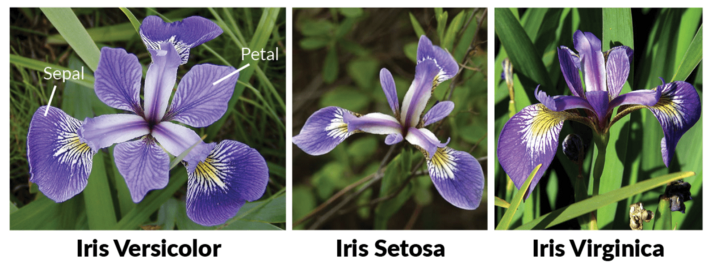

In [105]:
import seaborn as sns

iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [106]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [107]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


- isin()

In [108]:
iris['petal_length']

,petal_length
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4
...,...
145,5.2
146,5.0
147,5.2
148,5.4


In [109]:
cond = iris['petal_length'].isin([1.4,1.3])
cond

,petal_length
0,True
1,True
2,True
3,False
4,True
...,...
145,False
146,False
147,False
148,False


In [110]:
iris[cond]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa
8,4.4,2.9,1.4,0.2,setosa
12,4.8,3.0,1.4,0.1,setosa
16,5.4,3.9,1.3,0.4,setosa
17,5.1,3.5,1.4,0.3,setosa
28,5.2,3.4,1.4,0.2,setosa


In [111]:
cond = iris['petal_length'].isin([1.4,1.3])
iris[cond][:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa


In [112]:
cond = iris['petal_length'].isin([1.4,1.3])

In [113]:
cond[:5]

,petal_length
0,True
1,True
2,True
3,False
4,True


In [114]:
not True # False

False

In [115]:
~cond[:5]

,petal_length
0,False
1,False
2,False
3,True
4,False


In [116]:
cond = iris['petal_length'].isin([1.4,1.3])
iris[~cond][:5]

,sepal_length,sepal_width,petal_length,petal_width,species
3,4.6,3.1,1.5,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
7,5.0,3.4,1.5,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa
10,5.4,3.7,1.5,0.2,setosa


In [76]:
cond = iris[['petal_length']].isin([1.4,1.3,1.5,1.7])
cond

,petal_length
0,True
1,True
2,True
3,True
4,True
...,...
145,False
146,False
147,False
148,False


In [77]:
cond = iris['petal_length'].isin([1.4,1.3,1.5,1.7])
cond

,petal_length
0,True
1,True
2,True
3,True
4,True
...,...
145,False
146,False
147,False
148,False


In [78]:
cond = iris['petal_length'].isin([1.4,1.3,1.5,1.7])
iris[~cond][:5] # not 적용

,sepal_length,sepal_width,petal_length,petal_width,species
11,4.8,3.4,1.6,0.2,setosa
13,4.3,3.0,1.1,0.1,setosa
14,5.8,4.0,1.2,0.2,setosa
22,4.6,3.6,1.0,0.2,setosa
24,4.8,3.4,1.9,0.2,setosa


- iloc
> gets rows (and/or columns) at integer locations.

In [117]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [118]:
iris.iloc[4]

,4
sepal_length,5.0
sepal_width,3.6
petal_length,1.4
petal_width,0.2
species,setosa


In [81]:
iris.iloc[[1,2,-1]] # -1은 마지막 행번호를 나타냄(loc에서는 사용할 수 없음)

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
149,5.9,3.0,5.1,1.8,virginica


행과 열 조회

In [119]:
iris.iloc[:5,:3]

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


In [120]:
#
iris.iloc[[1,4],[1,2]]

,sepal_width,petal_length
1,3.0,1.4
4,3.6,1.4


- loc
> gets rows (and/or columns) with particular labels.

In [121]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [122]:
iris.loc[4]

,4
sepal_length,5.0
sepal_width,3.6
petal_length,1.4
petal_width,0.2
species,setosa


In [123]:
iris.loc[[1,2,3]]

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


행과 열 조회

In [87]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [125]:
iris.loc[:3,[0,1]]

KeyError: "None of [Index([0, 1], dtype='int64')] are in the [columns]"

In [126]:
iris.iloc[:3,[0,1]]

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2


In [127]:
iris.iloc[:,[0,1]][:2]

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0


In [128]:
iris.loc[:,['sepal_length', 'sepal_width']]

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [129]:
iris.loc[[1,4],['sepal_width', 'petal_length']]

,sepal_width,petal_length
1,3.0,1.4
4,3.6,1.4


In [130]:
iris.loc[[1,4],['sepal_width', 'petal_length']].shape

(2, 2)

In [131]:
iris.shape

(150, 5)

In [132]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [133]:
tmp = iris.head()
tmp.shape

(5, 5)

In [134]:
iris.loc[:4]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [135]:
iris.loc[:4].shape

(5, 5)

In [95]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 마스킹을 이용한 다중 조건

- & : and
> 두개의 조건이 모두 참인 경우, True
- | : or
> 두개 중 하나 이상의 조건이 참인 경우, True
- ~ : not
> 거짓인 경우, True

In [136]:
mask = iris['sepal_length'] < 5.0
iris.loc[mask].head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa
8,4.4,2.9,1.4,0.2,setosa


In [137]:
mask1 = iris['sepal_length'] < 5.0
mask2 = iris['sepal_width'] > 3.0
mask = mask1 & mask2

iris.loc[mask].head()

,sepal_length,sepal_width,petal_length,petal_width,species
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa
9,4.9,3.1,1.5,0.1,setosa
11,4.8,3.4,1.6,0.2,setosa


In [138]:
mask1 = iris['sepal_length'] < 5.0
mask2 = iris['sepal_width'] > 3.0
mask = mask1 | mask2

iris.loc[mask].head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [139]:
mask1 = iris['sepal_length'] < 5.0
mask2 = iris['sepal_width'] > 3.0
mask = mask1 | mask2

iris.loc[~mask].shape

(74, 5)

In [140]:
c1 = iris['sepal_length'] >= 5.0
c2 = iris['sepal_width'] <= 3.0
c = c1 & c2

iris.loc[c].shape

(74, 5)

#### 데이터 형식에 기반한 열 선택

In [141]:
iris.select_dtypes(include=np.number)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [142]:
iris.select_dtypes(include='float64')

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [143]:
iris.select_dtypes(exclude=np.number)

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica
